In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv(r"C:\Users\mohan\Desktop\EXCEL r assignment\random forest\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
max(data.Sales)

16.27

In [4]:
data.Sales.mean()

7.496325

In [5]:
data['Sales'] = data['Sales'].replace({0:7.49})
min(data.Sales)

0.16

In [6]:
sales=pd.cut(data.Sales,bins=[0,7.49,16.30],labels=['Low','High'])
sales

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [7]:
other=data.iloc[:,1:11] 
other_final=pd.get_dummies(other)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 

sales_f= label_encoder.fit_transform(sales)
 
sales_f

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [9]:
y=sales_f
x=other_final.values

In [17]:
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=100, max_features=4)
results = cross_val_score(model, x, y, cv=kfold)


0.8074999999999999


In [28]:
# accuracy for random forest classifier
print(results.mean())

0.8074999999999999


{'whiskers': [<matplotlib.lines.Line2D at 0x1dea4ab6820>,
 'caps': [<matplotlib.lines.Line2D at 0x1dea4ab6ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dea4ab64c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dea4ac85e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dea4ac8940>],
 'means': []}

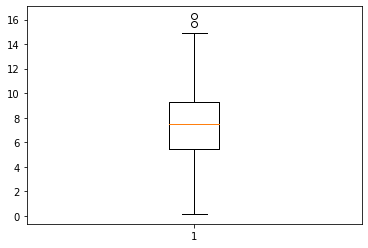

In [27]:
plt.boxplot(data['Sales'])

In [29]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grids = dict(n_estimators= range(50,100),max_features= range(1,10))
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 1/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 2/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 2/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 3/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 3/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 4/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 4/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 5/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 5/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 1/5; 2/450] START max_features=1, n_estimators=51...........................
[CV 1/5; 2/450] END .........max_features=1, 

In [30]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.8324999999999999, using {'max_features': 8, 'n_estimators': 89}
